### This notebook is used for cleaning the AMES data

In [1]:
#Import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import graphing utilities
import utilities.graphing_utils as utl

%matplotlib inline


In [2]:
#Load train.csv as a pandas DataFrame.
ames_train_df = pd.read_csv('./datasets/train.csv')

ames_train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
ames_train_df.shape

(2051, 81)

In [4]:
ames_train_df.columns = [ utl.convert_to_snake_case(col) for col in ames_train_df.columns]

In [5]:
ames_train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
# need to pay attend to Nan as a string....
ames_train_df.isna().sum().sort_values(ascending = False)[:30]

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
mo_sold              0
sale_type            0
full_bath            0
half_bath            0
dtype: int64

In [7]:
ames_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [8]:
features = ['utilities','lot_frontage', 'land_contour' 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 
            'bsmt_qual', 'garage_qual', 'garage_cond', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd','neighborhood','condition_1', 'condition_2'
            'bsmt_cond', 'exter_cond','exter_qual', 'full_bath', 'bedroom_abvgr', 'half_bath', 'central_air', 'bldg_type', 'house_style']


In [9]:

# fill nan with 0
ames_train_df['lot_frontage'].fillna(0, inplace = True)

In [10]:
# think about how the interaction of lot_area, lot_frontage ; land_slope and land_contour
ames_train_df['lot_frontage'].sort_values()

0         0.0
1453      0.0
463       0.0
1458      0.0
454       0.0
        ...  
1263    174.0
441     195.0
1875    200.0
1335    313.0
960     313.0
Name: lot_frontage, Length: 2051, dtype: float64

In [11]:
ames_train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [12]:
ames_train_df['lot_area'].value_counts()[:5]

9600     34
7200     27
6000     26
10800    19
9000     18
Name: lot_area, dtype: int64

In [13]:

ames_train_df['land_contour'].value_counts()
# not sure about the difference with these - mapping give Lvl - 3 HLS - 2 and everthing else 1

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64

In [14]:
ames_train_df['land_slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: land_slope, dtype: int64

In [15]:
ames_train_df['utilities'].value_counts() # there is another type ELO

AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [16]:
#binarize central_air
ames_train_df['central_air'].value_counts()

Y    1910
N     141
Name: central_air, dtype: int64

In [17]:
#condition_1 and condition_2 - determine what is positive and what is negative, then look into interaction
ames_train_df['condition_1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [18]:
ames_train_df['condition_2'].value_counts()

Norm      2025
Feedr       11
Artery       5
PosN         3
PosA         3
RRNn         2
RRAn         1
RRAe         1
Name: condition_2, dtype: int64

In [19]:
ames_train_df['condition_1']

0       RRAe
1       Norm
2       Norm
3       Norm
4       Norm
        ... 
2046    Norm
2047    Norm
2048    Norm
2049    Norm
2050    Norm
Name: condition_1, Length: 2051, dtype: object

In [20]:
#Interactage between bldg_type and house_style
ames_train_df['bldg_type'].value_counts()

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: bldg_type, dtype: int64

In [21]:
ames_train_df['house_style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

In [22]:
# calculate age for year_built and year_remod/add - in pipline

In [23]:
#create dummies for top 5 locations and then group the rest. 
ames_train_df['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [24]:
neighborhood_mean = ames_train_df.groupby(['neighborhood'])['saleprice'].mean().sort_values(ascending = False)
#above 75% 5(mean above 214_000); middle 50% 3(between 214_000 and 129_650), bottom 25% 1(below 129_650)
# this was based on a discussion with Mark Harris about a conversation that he had with John Hazard

In [25]:
neighborhood_mean

neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    130493.468531
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: saleprice, dtype: float64

In [26]:
neighborhood_mean.index = ['Stone Brook', 'Northridge Heights', 'Northridge', 'Green Hills', 'Veenker', 'Timberland', 'Somerset', 'Clear Creek', 'Crawford', 'College Creek', 
          'Bloomington Heights', 'Northwest Ames', 'Gilbert', 'Greens', 'Sawyer West', 'Mitchell', 'North Ames', 'Bluestem', 'Northpark Villa', 'Sawyer', 
          'Landmark', 'South & West of ISU', 'Edwards', 'Brookside', 'Old Town', 'Briardale', 'Iowa DOT and Rail Road', 'Meadow Village']

In [27]:
neighborhood_mean

Stone Brook               329675.736842
Northridge Heights        322831.352459
Northridge                316294.125000
Green Hills               280000.000000
Veenker                   253570.588235
Timberland                241051.354167
Somerset                  227183.900000
Clear Creek               217490.074074
Crawford                  205901.211268
College Creek             202497.216667
Bloomington Heights       200417.681818
Northwest Ames            194619.022989
Gilbert                   189228.387931
Greens                    188666.666667
Sawyer West               187760.160920
Mitchell                  167656.707317
North Ames                145905.816129
Bluestem                  144566.666667
Northpark Villa           140476.470588
Sawyer                    137181.909910
Landmark                  137000.000000
South & West of ISU       134758.875000
Edwards                   130493.468531
Brookside                 127022.697368
Old Town                  125276.300613


In [28]:
neighborhood_mean.index

Index(['Stone Brook', 'Northridge Heights', 'Northridge', 'Green Hills',
       'Veenker', 'Timberland', 'Somerset', 'Clear Creek', 'Crawford',
       'College Creek', 'Bloomington Heights', 'Northwest Ames', 'Gilbert',
       'Greens', 'Sawyer West', 'Mitchell', 'North Ames', 'Bluestem',
       'Northpark Villa', 'Sawyer', 'Landmark', 'South & West of ISU',
       'Edwards', 'Brookside', 'Old Town', 'Briardale',
       'Iowa DOT and Rail Road', 'Meadow Village'],
      dtype='object')

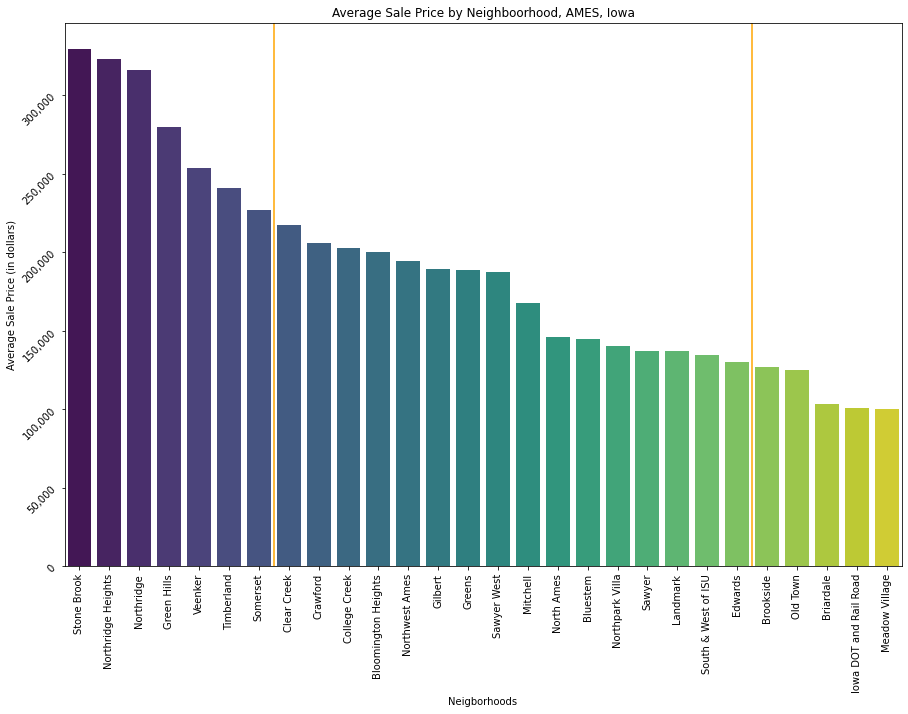

In [29]:
plt.figure(figsize = (15,10))
sns.barplot(x= neighborhood_mean.index,y = neighborhood_mean.values, palette= 'viridis' );
plt.title('Average Sale Price by Neighboorhood, AMES, Iowa')
plt.xlabel('Neigborhoods')
plt.xticks( rotation = 90)
plt.ylabel('Average Sale Price (in dollars)')
plt.yticks([0, 50_000, 100_000, 150_000, 200_000, 250_000, 300_000], 
                   ['0', '50,000', '100,000', '150,000', '200,000', '250,000', '300,000'],
                    rotation = 45);
plt.axvline(x = 6.5, color = 'orange')
plt.axvline(x = 22.5, color = 'orange')

The neighborhoods are grouped by the average sale price. The groupings are denoted by the orange lines. The groups are the top 25%, the middle 50% and the bottom 25%.

In [30]:
ames_train_df['neighborhood'].loc[1475,]

'Sawyer'

In [31]:
ames_train_df['overall_cond'].value_counts()

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: overall_cond, dtype: int64

In [32]:
ames_train_df['overall_qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: overall_qual, dtype: int64

In [33]:
#These values for lot_frontage are out very large. Insert median of 63
ames_train_df[ames_train_df['lot_frontage'] > 300]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1335,1266,535427070,20,RL,313.0,27650,Pave,NaN,IR2,HLS,...,0,0,NaN,NaN,NaN,0,11,2008,WD,242000


In [34]:
ames_train_df['lot_frontage'].describe()

count    2051.000000
mean       57.944417
std        33.137332
min         0.000000
25%        43.500000
50%        63.000000
75%        78.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [35]:
ames_train_df.iloc[960,4] = 63
ames_train_df.iloc[1335,4] = 63

In [36]:
ames_train_df[ames_train_df['lot_frontage'] > 300]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [37]:
ames_train_df['lot_frontage'].describe()

count    2051.000000
mean       57.700634
std        32.164912
min         0.000000
25%        43.500000
50%        63.000000
75%        78.000000
max       200.000000
Name: lot_frontage, dtype: float64

In [38]:
# lot area above 100_000. imput median of 9430
ames_train_df[ames_train_df['lot_area'] > 100_000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
471,2116,906426060,50,RL,0.0,159000,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,0.0,115149,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,NaN,0,6,2007,WD,302000


In [39]:
ames_train_df['lot_area'].describe()

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: lot_area, dtype: float64

In [40]:
ames_train_df.iloc[471, 5] = 9_430
ames_train_df.iloc[694, 5] = 9_430

In [41]:
ames_train_df['lot_area'].describe()

count     2051.000000
mean      9940.737689
std       5407.322350
min       1300.000000
25%       7500.000000
50%       9430.000000
75%      11500.000000
max      70761.000000
Name: lot_area, dtype: float64

In [42]:
#replace these values with median, 994
ames_train_df[ames_train_df['total_bsmt_sf'] > 5_000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,63.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [43]:
ames_train_df['total_bsmt_sf'].describe()

count    2050.000000
mean     1057.987805
std       449.410704
min         0.000000
25%       793.000000
50%       994.500000
75%      1318.750000
max      6110.000000
Name: total_bsmt_sf, dtype: float64

In [44]:
ames_train_df.columns[39]

'total_bsmt_sf'

In [45]:
ames_train_df.iloc[960,39] = 994
ames_train_df.iloc[1885,39] = 994

In [46]:
ames_train_df['total_bsmt_sf'].describe()

count    2050.000000
mean     1053.491707
std       426.079397
min         0.000000
25%       793.000000
50%       994.000000
75%      1316.750000
max      3206.000000
Name: total_bsmt_sf, dtype: float64

In [47]:
ames_train_df[ames_train_df['gr_liv_area']>4500]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,63.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [48]:
#Remove the entire row for 960,1885,

ames_train_df.drop([960,1885], inplace = True)

In [49]:
ames_train_df[ames_train_df['gr_liv_area']>4500]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [50]:
#drop row, data is outlier
ames_train_df[ames_train_df['garage_yr_blt'] > 2050]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,New,267300


In [51]:
ames_train_df.drop([1699], inplace = True)

In [52]:
ames_train_df[ames_train_df['garage_yr_blt'] > 2050]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [53]:
#row is an outlier, drop the row.
ames_train_df[ames_train_df['wood_deck_sf'] > 1200]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
966,2294,923229100,80,RL,0.0,15957,Pave,NaN,IR1,Low,...,0,0,NaN,MnPrv,NaN,0,9,2007,WD,188000


In [54]:
ames_train_df.drop(966, inplace = True)

In [55]:
ames_train_df[ames_train_df['wood_deck_sf'] > 1200]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [56]:
ames_train_df['kitchen_qual'].value_counts()

TA    1046
Gd     806
Ex     148
Fa      47
Name: kitchen_qual, dtype: int64

In [57]:
ames_train_df['street'].value_counts()

Pave    2040
Grvl       7
Name: street, dtype: int64

In [58]:
ames_train_df['ms_zoning'].value_counts()

RL         1594
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [59]:
# look at all the outdoor features....  after futher anaylsis there are not enought house that have the feautures.
# if I multiple the features together than the houses would need all three features without zeroing out.

In [60]:
# reset_index
ames_train_df.reset_index(drop = True, inplace = True)
ames_train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [61]:
#replace Masonry veneer area with 500
ames_train_df[ames_train_df['mas_vnr_area'] >1500]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1407,1850,533241030,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,...,198,0,NaN,NaN,NaN,0,6,2007,WD,239000


In [62]:
ames_train_df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [63]:
ames_train_df.iloc[1407, 27] = 500

In [64]:
ames_train_df[ames_train_df['mas_vnr_area'] >1500]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [65]:
ames_train_df.to_csv('./datasets/clean.csv')